In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

#load the data
Customer_df = pd.read_csv("Customer_Master_Data.csv")
Transaction_df = pd.read_csv("Customer_Transactions.csv")


In [2]:
Customer_df.shape

(1000, 9)

In [3]:
Transaction_df.shape

(23050, 3)

In [4]:
Customer_df.head(10)

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate
0,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22
1,CUST10001,Divit Kohli,mkalita@sarin.com,Female,48,Kolkata,Married,0,2023-12-06
2,CUST10002,Kiara Behl,apteanay@hotmail.com,Male,75,Kolkata,Widowed,2,2023-08-23
3,CUST10003,Vaibhav Sankar,bseshadri@choudhry.info,Male,62,Pune,Divorced,2,2022-11-17
4,CUST10004,Shray D’Alia,bdhillon@toor-mall.com,Male,55,Delhi,Divorced,0,2022-12-04
5,CUST10005,Fateh Sharaf,qkulkarni@gmail.com,Male,59,Jaipur,Single,3,2021-05-13
6,CUST10006,Khushi Wadhwa,craja@yahoo.com,Female,61,Hyderabad,Widowed,2,2021-11-12
7,CUST10007,Zeeshan Salvi,ira51@saini-kumar.com,Not Disclosed,32,Pune,Widowed,1,2021-08-10
8,CUST10008,Elakshi Trivedi,ayesha07@gmail.com,Female,32,Hyderabad,Widowed,4,2023-11-20
9,CUST10009,Neelofar Chada,abramsolanki@madan.com,Male,44,Jaipur,Single,0,2021-11-20


In [5]:
Transaction_df.head(10)

,CustomerID,TransactionDate,TransactionAmount
0,CUST10771,7/31/23,2383.07
1,CUST10100,3/10/24,497.54
2,CUST10031,2/17/25,536.78
3,CUST10987,7/17/23,314.89
4,CUST10831,12/15/24,2543.19
5,CUST10404,2/28/25,432.22
6,CUST10488,6/7/25,2178.25
7,CUST10988,3/25/25,85.46
8,CUST10657,9/10/23,1800.32
9,CUST10007,12/15/23,305.90


In [6]:
Customer_df.tail(10)

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate
990,CUST10990,Dhruv Shenoy,kumarpranay@borra-mani.com,Male,57,Chennai,Single,2,2021-03-13
991,CUST10991,Kavya Kant,chareshani@saraf-kanda.com,Female,24,Hyderabad,Divorced,2,2024-05-08
992,CUST10992,Khushi Tak,duamohanlal@anne.net,Not Disclosed,49,Pune,Married,3,2021-05-18
993,CUST10993,Saira Chakrabarti,mandakanav@chadha.com,Male,36,Mumbai,Married,0,2021-04-22
994,CUST10994,Badal Saini,rajuivan@gmail.com,Not Disclosed,29,Hyderabad,Widowed,3,2023-04-13
995,CUST10995,Mehul Chada,hridaanagate@hotmail.com,Male,70,Hyderabad,Divorced,2,2020-07-29
996,CUST10996,Arhaan Tara,qwali@mand-sood.com,Male,35,Delhi,Single,1,2022-07-24
997,CUST10997,Mahika Uppal,vdalal@yahoo.com,Female,70,Ahmedabad,Married,3,2023-01-27
998,CUST10998,Bhamini Aggarwal,kartik15@bajaj-singhal.com,Male,37,Jaipur,Single,0,2022-07-22
999,CUST10999,Alia Sekhon,urvichadha@hotmail.com,Male,67,Hyderabad,Widowed,1,2021-09-07


In [7]:
#Missing Values
Missing_value_Customer = Customer_df.isnull().sum()
print(f'Missing Values in Customer Master Data:')
print(Missing_value_Customer)

Missing_value_transaction = Transaction_df.isnull().sum()
print(f'Missing Values in Trasaction Data:')
print(Missing_value_transaction)

Missing Values in Customer Master Data:
CustomerID       0
Name             0
Email            0
Gender           0
Age              0
City             0
MaritalStatus    0
NumChildren      0
JoinDate         0
dtype: int64
Missing Values in Trasaction Data:
CustomerID           0
TransactionDate      0
TransactionAmount    0
dtype: int64


In [8]:
# To validate the give data type are in required data type .
Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   object
 1   Name           1000 non-null   object
 2   Email          1000 non-null   object
 3   Gender         1000 non-null   object
 4   Age            1000 non-null   int64 
 5   City           1000 non-null   object
 6   MaritalStatus  1000 non-null   object
 7   NumChildren    1000 non-null   int64 
 8   JoinDate       1000 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [9]:
Transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23050 entries, 0 to 23049
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         23050 non-null  object 
 1   TransactionDate    23050 non-null  object 
 2   TransactionAmount  23050 non-null  float64
dtypes: float64(1), object(2)
memory usage: 540.4+ KB


In [10]:
# We need to ensure that Join Date column should be in datetime format
# Converting all the date columns in datetime format
Customer_df['JoinDate'] = pd.to_datetime(Customer_df['JoinDate'])
Transaction_df['TransactionDate'] = pd.to_datetime(Transaction_df['TransactionDate'])

C:\Users\sahup\AppData\Local\Temp\ipykernel_7544\2690144038.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Transaction_df['TransactionDate'] = pd.to_datetime(Transaction_df['TransactionDate'])


In [16]:
print(f'Total customer data in master data',Customer_df.shape[0])
print(f'Total transaction data ',Transaction_df.shape[0])

Total customer data in master data 1000
Total transaction data  23050


In [17]:
#To check whether it contains any other things is there
Customer_df['Gender'].value_counts()

Gender
Female           340
Male             332
Not Disclosed    328
Name: count, dtype: int64

In [18]:
 # To Keep only valid transactions 
# We keep transactions whose CustomerID exists in the master customer data
Transaction_df = Transaction_df[Transaction_df['CustomerID'].isin(Customer_df['CustomerID'])].copy()
Transaction_df.shape[0]

23050

In [19]:
 # RFM Calculation
 # Reference Date = max transaction date + 1 day
ref_date = Transaction_df['TransactionDate'].max()+timedelta(days=1)
print(ref_date)

2025-07-30 00:00:00


In [20]:
#For Each Customer:
#1.Last Transcation:Most recent purchase date
#2.Frequancy:Number of rows purchases
#3.Monetary:TransactionAmount
rfm = Transaction_df.groupby('CustomerID').agg(
    Last_Trasaction = ('TransactionDate','max'),
    Frequency = ('TransactionDate','count'),
    Monetary = ('TransactionAmount','sum')
).reset_index()
rfm.head(10)

,CustomerID,Last_Trasaction,Frequency,Monetary
0,CUST10000,2025-07-17,23,21265.49
1,CUST10001,2025-06-25,30,28654.31
2,CUST10002,2025-07-12,24,23884.03
3,CUST10003,2025-05-10,25,24206.03
4,CUST10004,2025-07-22,19,25565.30
5,CUST10005,2025-07-06,29,29459.82
6,CUST10006,2025-07-19,28,27922.36
7,CUST10007,2025-05-05,15,14957.06
8,CUST10008,2025-07-27,19,19479.25
9,CUST10009,2025-07-23,25,22832.83


In [21]:
 # Recency (in days) =  ref_date - Last Transaction date
rfm['Recency'] = (ref_date - rfm['Last_Trasaction']).dt.days
rfm.head(20)

,CustomerID,Last_Trasaction,Frequency,Monetary,Recency
0,CUST10000,2025-07-17,23,21265.49,13
1,CUST10001,2025-06-25,30,28654.31,35
2,CUST10002,2025-07-12,24,23884.03,18
3,CUST10003,2025-05-10,25,24206.03,81
4,CUST10004,2025-07-22,19,25565.30,8
5,CUST10005,2025-07-06,29,29459.82,24
6,CUST10006,2025-07-19,28,27922.36,11
7,CUST10007,2025-05-05,15,14957.06,86
8,CUST10008,2025-07-27,19,19479.25,3
9,CUST10009,2025-07-23,25,22832.83,7


In [62]:
 # Put the columns in desired sequence
rfm = rfm[['CustomerID','Recency','Frequency','Monetary']]
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary
0,CUST10000,13,23,21265.49
1,CUST10001,35,30,28654.31
2,CUST10002,18,24,23884.03
3,CUST10003,81,25,24206.03
4,CUST10004,8,19,25565.30
5,CUST10005,24,29,29459.82
6,CUST10006,11,28,27922.36
7,CUST10007,86,15,14957.06
8,CUST10008,3,19,19479.25
9,CUST10009,7,25,22832.83


In [22]:
#Defining the Score from R/F/M
#Recency(lower is better)
#<=30 days : 5
#<=60 days : 4
#<=120 days: 3
#<=240 days :2
#>240 days  :1
r_bins = [0, 30, 60, 120, 240, float("inf")]
r_labels = [5, 4, 3, 2, 1]                     # reverced because lower recency is better
rfm['R_Score'] = pd.cut(rfm['Recency'],bins=r_bins,labels=r_labels,include_lowest=True).astype(int)
 
# Frequency (higher is better)
 # <=7 : 1
 # <=14 : 2
 # <=21 : 3
 # <=28 : 4
 # >28 : 5
f_bins = [0, 7, 14, 21, 28, float("inf")]
f_labels = [1, 2, 3, 4, 5]                   
rfm['F_Score'] = pd.cut(rfm['Frequency'],bins=f_bins,labels=f_labels,include_lowest=True).astype(int)

# Monetary (higher is better)
 # <= 10000 : 1
 # <=20000 :2
 # <=30000 : 3
 # <=40000 : 4
 # > 40000 : 5
m_bins = [0, 10000, 20000, 30000, 40000, float("inf")]
m_labels = [1,2,3,4,5]
rfm['M_Score'] = pd.cut(rfm['Monetary'],bins=m_bins,labels=m_labels,include_lowest=True).astype(int) 


In [23]:
rfm.head(20)

,CustomerID,Last_Trasaction,Frequency,Monetary,Recency,R_Score,F_Score,M_Score
0,CUST10000,2025-07-17,23,21265.49,13,5,4,3
1,CUST10001,2025-06-25,30,28654.31,35,4,5,3
2,CUST10002,2025-07-12,24,23884.03,18,5,4,3
3,CUST10003,2025-05-10,25,24206.03,81,3,4,3
4,CUST10004,2025-07-22,19,25565.30,8,5,3,3
5,CUST10005,2025-07-06,29,29459.82,24,5,5,3
6,CUST10006,2025-07-19,28,27922.36,11,5,4,3
7,CUST10007,2025-05-05,15,14957.06,86,3,3,2
8,CUST10008,2025-07-27,19,19479.25,3,5,3,2
9,CUST10009,2025-07-23,25,22832.83,7,5,4,3


In [64]:
#RFM Scroring
rfm['RFM_Score']=(rfm['R_Score'].astype(str)+rfm['F_Score'].astype(str)+rfm['M_Score'].astype(str))
rfm.head(20) 

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,CUST10000,13,23,21265.49,5,4,3,543
1,CUST10001,35,30,28654.31,4,5,3,453
2,CUST10002,18,24,23884.03,5,4,3,543
3,CUST10003,81,25,24206.03,3,4,3,343
4,CUST10004,8,19,25565.30,5,3,3,533
5,CUST10005,24,29,29459.82,5,5,3,553
6,CUST10006,11,28,27922.36,5,4,3,543
7,CUST10007,86,15,14957.06,3,3,2,332
8,CUST10008,3,19,19479.25,5,3,2,532
9,CUST10009,7,25,22832.83,5,4,3,543


In [24]:
#Naming the segments
def segment_row(r,f,m):  
    if (r>=4) and (f>=4) and (m>=4):
        return "Champions"
    elif (f>=4) and (r>=2):
        return "Loyal"
    elif (r>=4) and (2<=f<=3):
        return "Potential Loyalist"
    elif (r<=2) and (f>=3):
        return "At Risk"
    elif (m>=4) and (2<=f<=3) and (r>=3):
        return "Big Spenders"
    elif (r==1) and (f<=2) and (m<=2):
        return "Lost"
    else:
        return "Others"
rfm["Segment"] = [segment_row(r, f, m) for r, f, m in zip(rfm["R_Score"], rfm["F_Score"], rfm["M_Score"])]

In [25]:
rfm.head(30)

,CustomerID,Last_Trasaction,Frequency,Monetary,Recency,R_Score,F_Score,M_Score,Segment
0,CUST10000,2025-07-17,23,21265.49,13,5,4,3,Loyal
1,CUST10001,2025-06-25,30,28654.31,35,4,5,3,Loyal
2,CUST10002,2025-07-12,24,23884.03,18,5,4,3,Loyal
3,CUST10003,2025-05-10,25,24206.03,81,3,4,3,Loyal
4,CUST10004,2025-07-22,19,25565.30,8,5,3,3,Potential Loyalist
5,CUST10005,2025-07-06,29,29459.82,24,5,5,3,Loyal
6,CUST10006,2025-07-19,28,27922.36,11,5,4,3,Loyal
7,CUST10007,2025-05-05,15,14957.06,86,3,3,2,Others
8,CUST10008,2025-07-27,19,19479.25,3,5,3,2,Potential Loyalist
9,CUST10009,2025-07-23,25,22832.83,7,5,4,3,Loyal


In [26]:
#Simple Business Analysis
print("\n ==============SIMPLE BUSINESS ANALYSIS================")
print("\n=======================")
#1.Overal Businness Summary
print("\n=======================")
Total_customers = rfm['CustomerID'].shape[0]
total_Revenue = rfm['Monetary'].sum()
avg_Revenue_per_customer = rfm["Monetary"].mean()

print(f'Total Customer:{Total_customers}')
print(f'Total Revenue:{total_Revenue}')
print(f'Average Reveue per Customer:{avg_Revenue_per_customer}')

#Segment wise Summery
print("\n=======================")
#Customer in each segment
print("\n=======================")
segment_customers = rfm['Segment'].value_counts()
print(f'Numer of Category in each segment')
print(segment_customers)
print("\n=======================")
#Revenue from each segment
print("\n=======================")
revenue_Segment = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False).reset_index()

print(f' Revenue contribution from Each segment')
print(revenue_Segment)



 ==============SIMPLE BUSINESS ANALYSIS================


Total Customer:1000
Total Revenue:23053199.66
Average Reveue per Customer:23053.19966


Numer of Category in each segment
Segment
Loyal                 542
Potential Loyalist    248
Champions              84
Others                 77
At Risk                47
Lost                    2
Name: count, dtype: int64


 Revenue contribution from Each segment
              Segment     Monetary
0               Loyal  13381926.89
1  Potential Loyalist   4495435.99
2           Champions   2791699.03
3              Others   1416376.98
4             At Risk    938539.38
5                Lost     29221.39


C:\Users\sahup\AppData\Local\Temp\ipykernel_7544\1821196281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=rfm['Segment'],data=rfm,palette="pastel")


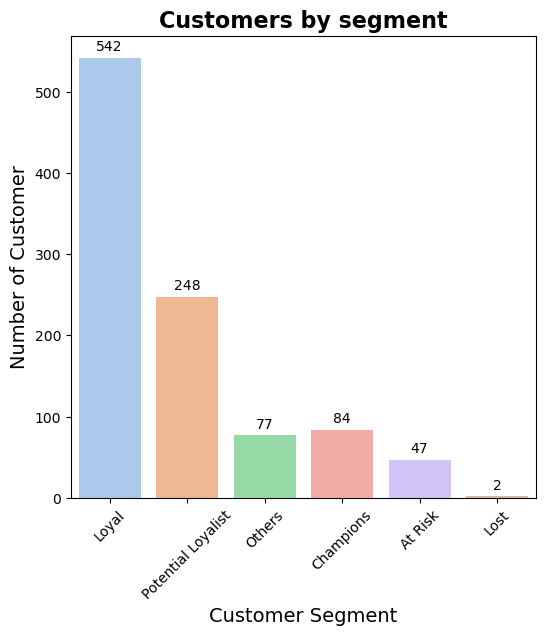

In [27]:
#Vizualisation
#Count of customers in each segment 
segment_customers = rfm['Segment'].value_counts()
plt.figure(figsize=(6,6))
ax=sns.countplot(x=rfm['Segment'],data=rfm,palette="pastel")
plt.title("Customers by segment",fontsize=16,fontweight='bold')
plt.xlabel("Customer Segment",fontsize=14)
plt.ylabel("Number of Customer",fontsize=14)
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container,fmt="%d",padding=3)
plt.show()

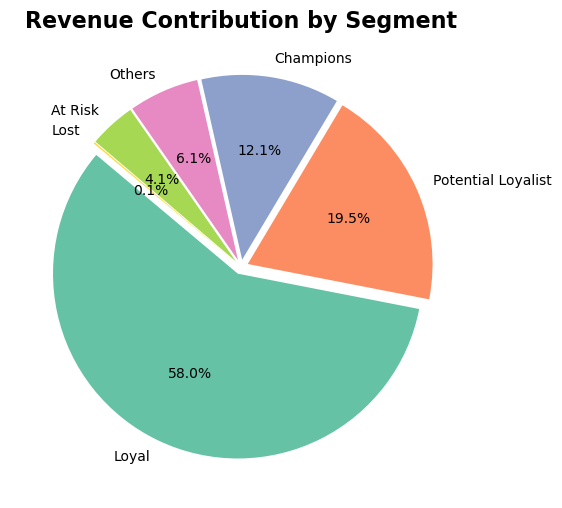

In [28]:
#pie Chart
plt.figure(figsize=(6,6))
plt.pie(revenue_Segment["Monetary"],labels=revenue_Segment["Segment"],startangle=140,
        autopct="%1.1f%%",explode=[0.04]*len(revenue_Segment),colors=sns.color_palette("Set2"))
plt.title("Revenue Contribution by Segment",fontsize=16, fontweight='bold')
plt.show()

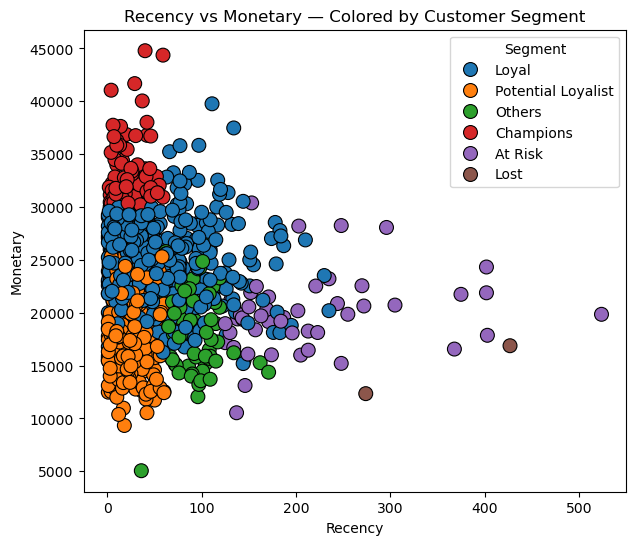

In [29]:
#Recency vs Monetary scatter plot colored by segment
plt.figure(figsize=(7,6))
sns.scatterplot(x="Recency",y="Monetary",hue="Segment",data=rfm,s=100,edgecolor="black",color="set1")
plt.title("Recency vs Monetary — Colored by Customer Segment")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

In [30]:
print(rfm['Monetary'].describe())

count     1000.00000
mean     23053.19966
std       5622.44101
min       5052.69000
25%      18965.46250
50%      22969.82000
75%      26827.39250
max      44784.99000
Name: Monetary, dtype: float64


In [31]:
#Pareto Analysis
# Sort customers by Monetary value descending
rfm_sorted=rfm.sort_values('Monetary',ascending=False)

# Calculate cumulative revenue percentage
rfm_sorted['CumRevenue'] =100* rfm_sorted['Monetary'].cumsum()/rfm_sorted['Monetary'].sum()

# Find the position where cumulative revenue crosses 80%
x80 = rfm_sorted.loc[rfm_sorted['CumRevenue']>=80,'CustomerID'].index[0]+1
# Calculate the percentage of customers up to that point
pct_customer = 100*x80/len(rfm_sorted)

print(f'Top {pct_customer:.1f}% of customer contribute 80% of total revenue')

Top 61.9% of customer contribute 80% of total revenue
